<a href="https://colab.research.google.com/github/maridufo/UDEA/blob/main/Trabajo_fundamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Integrantes**:  
Maria Camila Duarte Foronda  
Stiven Cadavid Cataño  
Yohiner Andrés Borja Góez

**Importar librerías**

In [2]:
!pip install --upgrade matplotlib
!pip install pingouin
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 18.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.3 MB/s eta 0:00:00


#### **Heart Diseases**####


**Contenido**

Objetivos:
* a. Realizar analisis exploratorio de datos
* b. Realizar limpieza y transformación de datos requeridos
* c. Identificar las variables más relacionadas con la variable objetivo
* d. Relacionar variables dadas las distribuciones y usando diferencias de medias, apoyandonos en plots.
* e.Realizar ejercicios de correlación, explicar muy detalladamente como es el calculo y cuales son los supuestos debajo del test de correlación de pearson.
* d. Realizar tablas de contigencia con medias, maximos. Aprovechando las varaibles categoricas.

### **Base de datos: enfermedad cardíaca en pacientes** ###
El repositorio utilizado contiene 4 bases de datos relacionadas con el diagnóstico de enfermedades cardíacas. Todos los atributos tienen valores numéricos. Los datos fueron recopilados de los siguientes lugares:

   1. Instituto de Cardiología de Hungría. Budapest: Andras Janosi, M.D.
   2. Hospital Universitario, Zurich, Suiza: William Steinbrunn, M.D.
   3. Hospital Universitario, Basilea, Suiza: Matthias Pfisterer, M.D.
   4. Centro Médico de la V.A., Long Beach, y Fundación Cleveland Clinic:

Cada base de datos tiene el mismo formato de instancia. Mientras que las bases de datos tienen 76 atributos brutos, solo se utilizan 14 de ellos.

Para este ejercicio sólo se utilizará la información de la base de datos    4. Centro Médico de la V.A., Long Beach, y Fundación Cleveland Clinic, el cual contiene 303 instancias.

En particular, la base de datos de Cleveland es la única que ha sido utilizada por investigadores de aprendizaje automático hasta la fecha. El campo "target" se refiere a la presencia de enfermedad cardíaca en el paciente. Tiene un valor entero de 0 (sin presencia) a 4. Los experimentos con la base de datos de Cleveland se han concentrado en simplemente intentar distinguir la presencia (valores 1,2,3,4) de la ausencia (valor 0).

Los nombres y números de seguro social de los pacientes fueron eliminados recientemente de la base de datos, reemplazados con valores ficticios.

## Descripción y definición de las variables ##

1) age: Edad del paciente.
2) sex: Género del paciente (1 = masculino, 0 = femenino).
3) cp: Tipo de dolor en el pecho (1 = angina típica, 2 = angina atípica, 3 = dolor no anginoso, 4 = asintomático).
4) trestbps: Presión arterial en reposo (en mm Hg).
5) chol: Colesterol sérico (mg/dl).
6) fbs: Nivel de azúcar en sangre en ayunas (1 = superior a 120 mg/dl, 0 = de lo contrario).
7) restecg: Resultados del electrocardiograma en reposo (0 = normal, 1 = con anormalidades de la onda ST-T, 2 = con hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes).
8) thalach: Frecuencia cardíaca máxima alcanzada.
9) exang: Angina inducida por ejercicio (1 = sí, 0 = no).
10) oldpeak: Depresión del ST inducida por el ejercicio en relación con el descanso.
11) slope: Pendiente del segmento ST pico del ejercicio (1 = pendiente ascendente, 2 = plano, 3 = pendiente descendente).
12) ca: Número de vasos principales coloreados por fluoroscopia (0-3).
13) thal: Tipo de thalasemia (3 = normal; 6 = defecto fijo; 7 = defecto reversible).
14) target: Presencia de enfermedad cardíaca (0 = no, 1 = sí).
El objetivo general de utilizar este conjunto de datos es desarrollar modelos predictivos que puedan ayudar a prever la probabilidad de que un paciente tenga o no enfermedad cardíaca en función de estas características clínicas.

### Importar librerias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import plotly.express as px

Inicio análisis exploratorio con el objetivo de hallar las relaciones entre variables que ayuden a explicar la presencia de enfermedad cardiaca en los pacientes


### Lectura y consolidación de datos ###

In [6]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv("https://archive.ics.uci.edu/static/public/45/data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


La base de datos contiene 303 filas (pacientes) con información de 14 variables, de las cuales 2 de ellas poseen valores faltantes (ca y thal). Así mismo, la variable objetivo (num) viene identificada con un nombre que requiere un ajuste para mejor comprensión, por lo cual se identificará como 'target'. Si bien todos los tipos de las variables son numéricas, se debe tener presente que algunas de ellas provienen de variables categóricas nominales.

### Análisis de  la calidad de los datos ###

###**1. Organizar datos:**

In [7]:
df.rename(columns={'num': 'target'}, inplace=True)
df['target']=np.where(df['target']>=1,1,0)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Se realizó el cambio de la variable objetivo a 'target' y se llevaron los valores de dicha variable a sólo dos categorías (0,1).

###]**2. Conocer el tamaño del DataFrame:**

In [ ]:
print("Número de filas", df.shape[0])
print("Número de columnas", df.shape[1])

Número de filas 303
Número de columnas 14


###**3. Identificación de  duplicados en las columnas del Df:**

In [ ]:
df.duplicated().any() ### valido los duplicados

False

No se detectaron valores duplicados que deban ser removidos de la base original

###**4. Identificar valores nulos:**

In [ ]:
df.isna().sum() ## valido las nulidade entre todas las variables

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Se hace necesario imputar valores en las variables ca: 4 nulos y thal: 2 nulos. En consideración a que son pocos valores en compararación con el total de datos y que son variables categóricas, serán imputados con la moda correspondiente.

###**5. Tratamiento de datos nulos:**

In [ ]:
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [ ]:
df['ca'].fillna(df['ca'].mode()[0], inplace=True) # imputa valores de "ca" con la moda

In [ ]:
df['ca'].value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [ ]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64

In [ ]:
df['thal'].fillna(df['thal'].mode()[0], inplace=True) # imputa valores de "thal" con la moda

In [ ]:
df['thal'].value_counts()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

In [ ]:
df.isnull().sum() # valida la existencia de valores nulos

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###**6. Definición de la variable respuesta:**

In [ ]:
## target: Presencia de enfermedad cardíaca (0 = no, 1 = sí)
df['target'].value_counts()

0    164
1    139
Name: target, dtype: int64

###**7. identificar proporción de la variable obtejetivo en el conjunto de datos:**

In [ ]:
# Define colores personalizados para el gráfico de pastel
custom_colors = ['#3498db', '#001f3f']

# Crea el gráfico de pastel utilizando plotly express
fig = px.pie(names=['Sin presencia de enfermedad cardíaca', 'Con presencia de enfermedad cardíaca'],
             values=df['target'].value_counts().values,
             title='Distribución de la variable objetivo',
             color_discrete_sequence=custom_colors)

# Ajusta la posición horizontal del título del gráfico
fig.update_layout(title_x=0.5)

# Muestra el gráfico
fig.show()

**Conclusión diagrama 'Distribución de la variable objetivo'**
Podemos observar que en los datos de entrada, la variable objetivo muestra una mayor frecuencia de personas sin enfermedad cardíaca en comparación con aquellas que muestran la presencia de esta enfermedad.

###**8. identificar variables y clasificarlas en cuantitativas y cualitativas:**

In [ ]:
#Creación de dos listas vacías:
# 1. Almacenar el nombre de las columnas categóricas (categoricas)
# 2. Almacenar de las columnas numéricas (numericas).
categoricas=[]
numericas=[]
for column in df.columns:
  if df[column].nunique()<=10: ## Comprueba si el número de valores únicos en la columna actual es menor o igual a 10.
    categoricas.append(column)
  else:
    numericas.append(column)

In [ ]:
categoricas

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
numericas

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

###**9. Descripción de variables cuantitativas:**

**9.1 Variable: 'age' (edad):**

media de la edad en el dataset  54.43894389438944
El minimo de la edad abordada en el dataset fue de: 29
El máximo de la edad abordada en el dataset fue de: 77


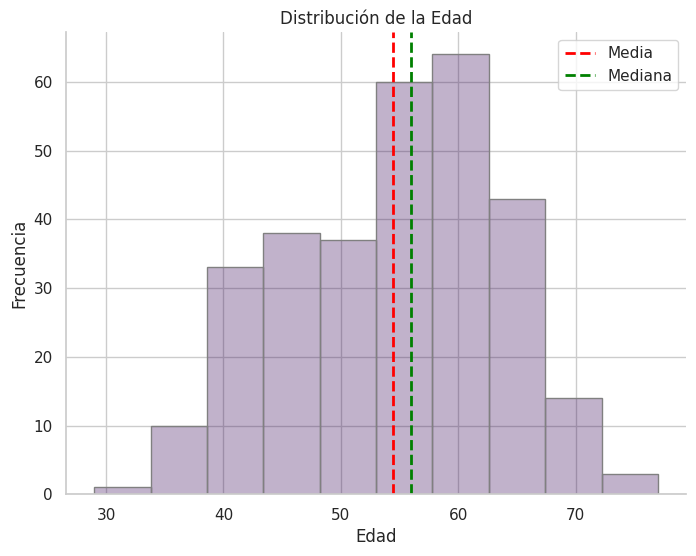

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['age'], bins=10, color='#3057', edgecolor='gray', alpha=0.3, ax=ax)
ax.set_title('Distribución de la Edad')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')

# Oculta las líneas superior y derecha del gráfico
ax.spines[['top', 'right']].set_visible(False)

# Líneas verticales para la media y mediana.
ax.axvline(x=df.age.mean(), color='red', linestyle='dashed', linewidth=2, label='Media')
ax.axvline(x=df.age.median(), color='green', linestyle='dashed', linewidth=2, label='Mediana')

# Agrega una leyenda
ax.legend()

# Muestra la media, el mínimo y el máximo de la columna 'age' del DataFrame df.
print("media de la edad en el dataset ", df.age.mean())
print("El minimo de la edad abordada en el dataset fue de:", df.age.min())
print("El máximo de la edad abordada en el dataset fue de:", df.age.max())

plt.show()

### Conclusión diagrama 'Distribución de la Edad':
-La media de la edad en el dataset  54.43894389438944, el minimo de la edad abordada en el dataset fue de: 29  y
el máximo de la edad abordada en el dataset fue de: 77

Analisis de simetria en la distribución:la simetría se refiere a cómo están distribuidos los valores a lo largo de un eje central.

- Distribusción simetria: Si la distribución está sesgada hacia la izquierda (asimetría negativa), la media será menor que la mediana, y ambas serán menores que la moda.

- Distribución asimetria: La media y la mediana estarán ubicadas centralmente cerca del punto alto de la distribución.

**Conclusión**: la distribución de la variable 'Age'es 'simétrica', la media es similar a la mediana lo que podría dar indicios de normalidad.

**9.2 Variable: 'trestbps' (Presión arterial en reposo en mmHg)**

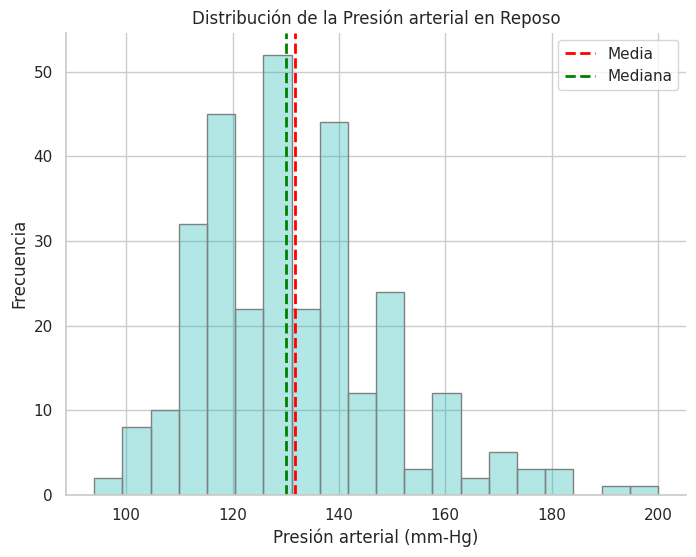

In [ ]:

# Configuración del histograma
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['trestbps'], bins=20, color='#00B2A9', edgecolor='gray', alpha=0.3, ax=ax)
ax.set_title('Distribución de la Presión arterial en Reposo')
ax.set_xlabel('Presión arterial (mm-Hg)')
ax.set_ylabel('Frecuencia')

# Oculta las líneas superior y derecha del gráfico
ax.spines[['top', 'right']].set_visible(False)

# Líneas verticales para la media y mediana
ax.axvline(x=df.trestbps.mean(), color='red', linestyle='dashed', linewidth=2, label='Media')
ax.axvline(x=df.trestbps.median(), color='green', linestyle='dashed', linewidth=2, label='Mediana')

# Agrega una leyenda
ax.legend()

# Muestra el histograma
plt.show()

### Conclusión diagrama 'Distribución de la Presión arterial en Reposo':
Analisis de simetria en la distribución:la simetría se refiere a cómo están distribuidos los valores a lo largo de un eje central.

- Distribusción simetria: Si la distribución está sesgada hacia la izquierda (asimetría negativa), la media será menor que la mediana, y ambas serán menores que la moda.

- istribución asimetria: La media y la mediana estarán ubicadas centralmente cerca del punto alto de la distribución.

**Conclusión**: la distribución de la variable 'trestbps'es 'Simetrica', seria un indicio de que los datos podrian seguir una distribución normal.

**9.2 Variable: 'chol' (Colesterol):**

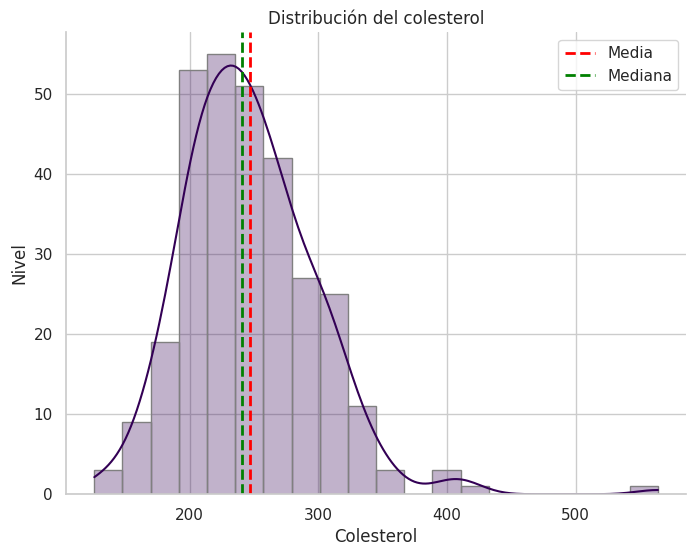

Media del colesterol: 246.69306930693068


In [ ]:
# Configuración del histograma
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['chol'], bins=20, kde=True, color='#3057', edgecolor='gray', alpha=0.3, ax=ax)
ax.set_title('Distribución del colesterol')
ax.set_xlabel('Colesterol')
ax.set_ylabel('Nivel')

# Oculta las líneas superior y derecha del gráfico
ax.spines[['top', 'right']].set_visible(False)

# Líneas verticales para la media y mediana
ax.axvline(x=df.chol.mean(), color='red', linestyle='dashed', linewidth=2, label='Media')
ax.axvline(x=df.chol.median(), color='green', linestyle='dashed', linewidth=2, label='Mediana')

# Agrega una leyenda
ax.legend()

# Muestra el histograma
plt.show()

# Muestra la media de la variable
print("Media del colesterol:", df.chol.mean())

### Conclusión diagrama 'Distribución del colesterol':
Analisis de simetria en la distribución:la simetría se refiere a cómo están distribuidos los valores a lo largo de un eje central.

- Distribusción simetria: Si la distribución está sesgada hacia la izquierda (asimetría negativa), la media será menor que la mediana, y ambas serán menores que la moda.

- istribución asimetria: La media y la mediana estarán ubicadas centralmente cerca del punto alto de la distribución.

**Conclusión**: la distribución de la variable 'chol'es 'Simetrica', seria un indicio de que los datos podrian seguir una distribución normal. Se requiere la revisión de los valores extremos

###**10. Identificación de valores atípicos:**

En estadísticas, el Rango Intercuartílico (RQ) se calcula como la diferencia entre el tercer cuartil (\(Q3\)) y el primer cuartil (\(Q1\)):

\[ RQ = Q3 - Q1 \]


**10.2. Identificación de atípicos con boxplot**

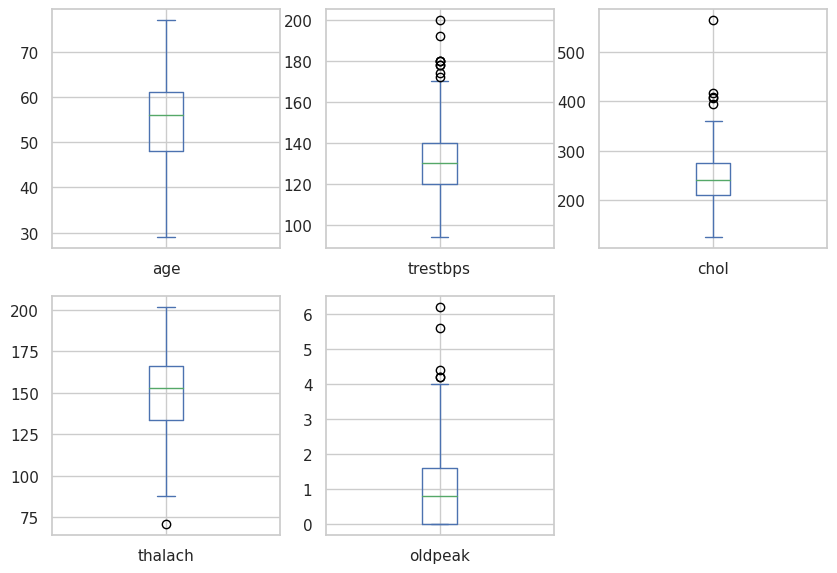

In [ ]:
df[numericas].plot(kind='box', subplots=True, layout=(5,3), figsize=(10,18))
plt.show()

**10.3 : Resultado tratamiento atìpicos**

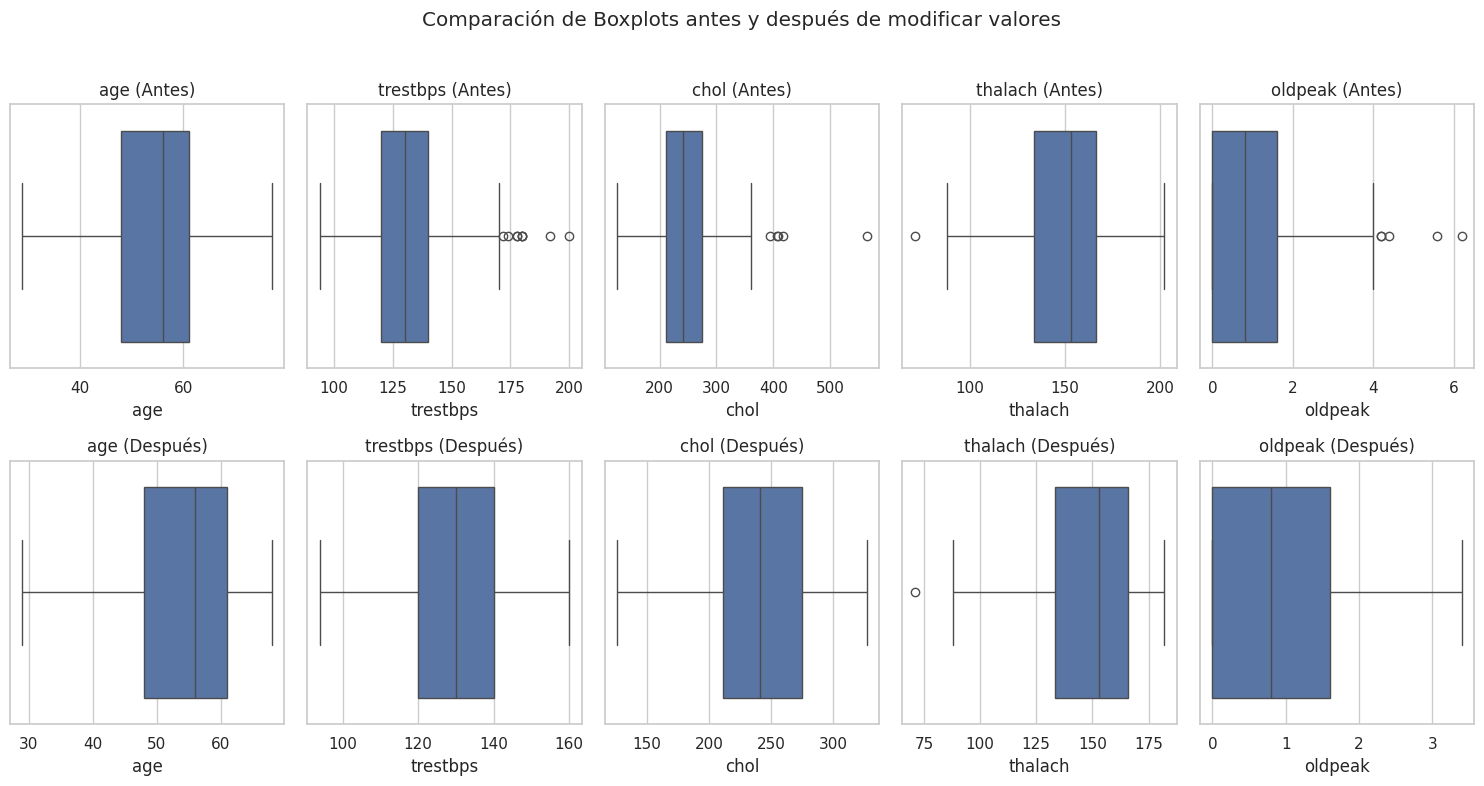

In [ ]:
# Crear subplots para comparar boxplots antes y después de modificar valores
fig, axes = plt.subplots(nrows=2, ncols=len(numericas), figsize=(15, 8))
fig.suptitle('Comparación de Boxplots antes y después de modificar valores')

# Boxplots antes de modificar valores
for i, variable in enumerate(numericas):
    sns.boxplot(x=df[variable], ax=axes[0, i])
    axes[0, i].set_title(f'{variable} (Antes)')

# Modificar valores por encima del percentil 75
for variable in numericas:
    Q3 = df[variable].quantile(0.95)
    df.loc[df[variable] > Q3, variable] = Q3

# Boxplots después de modificar valores
for i, variable in enumerate(numericas):
    sns.boxplot(x=df[variable], ax=axes[1, i])
    axes[1, i].set_title(f'{variable} (Después)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

###**11.  identificar relación entre variables:**

**11.1 Entre  variables númericas númericas:**

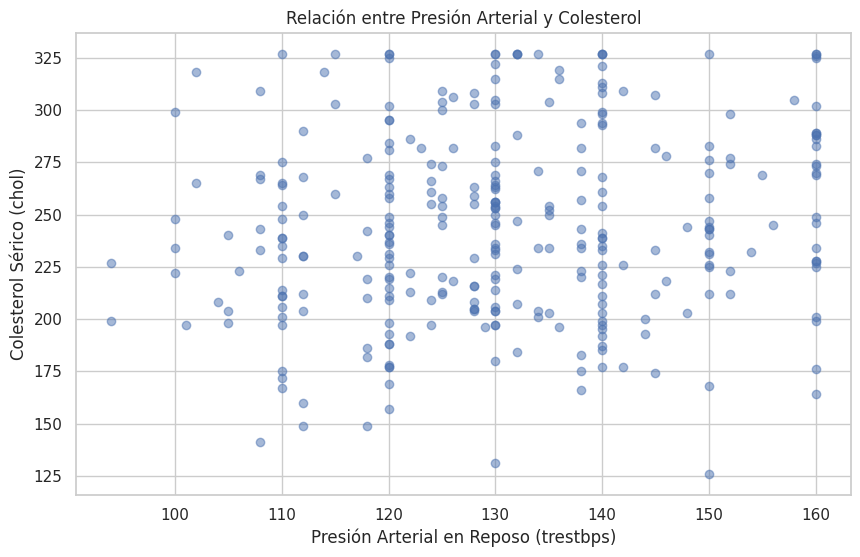

In [ ]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['trestbps'], df['chol'], alpha=0.5)

# Configurar etiquetas y título
plt.title('Relación entre Presión Arterial y Colesterol')
plt.xlabel('Presión Arterial en Reposo (trestbps)')
plt.ylabel('Colesterol Sérico (chol)')

# Mostrar el gráfico
plt.show()

### Conclusión diagrama 'Presión Arterial en reposo y Colesterol':

**Conclusión:** no se observan patrones claros que permitan identificar alguna relación entre la presión arterial y el colesterol. Aunque Se puede observar una mayor concentración de puntos en colesterol alto por encima de 200 y de presión arterial mayor 120.

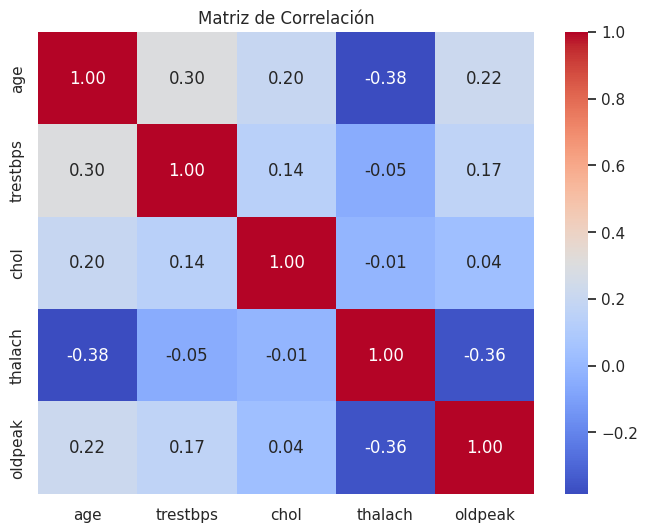

In [ ]:
# Crear una figura de matplotlib con un tamaño específico
plt.figure(figsize=(8, 6))

# Crear un mapa de calor de la matriz de correlación de las columnas numéricas del DataFrame 'df'.
# Se utilizará Seaborn para visualizar el mapa de calor. Las anotaciones estarán activadas y mostrarán
# los valores de las correlaciones. El mapa de color se establece en 'coolwarm' para una mejor visualización.
# El formato de los valores de correlación se establece en '.2f', lo que significa que se mostrarán con dos decimales.
sns.heatmap(df[numericas].corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Establecer el título del gráfico
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

### Conclusión diagrama 'Matriz de correlación:

**Conclusión:** Se puede observar que las variables númericas son linealmente independientes. Las correlaciones más fuertes se identificaron entre las siguientes variables:

edad - thalach: Frecuencia cardíaca máxima alcanzada: -0.38 inversa  
oldpeak - thalach: Frecuencia cardíaca máxima alcanzada -0.36 inversa

No se identificaron correlaciones significativamente altas que llevaran a un análisis más detallado de reducción de dimensionalidad.

**Analisis t-test independiente (test de medias):**

El t-test se utiliza para comparar las medias de dos grupos diferentes y determinar si existen diferencias significativas entre ellos.En este caso, se está comparando la **presión arterial en reposo** (trestbps) entre dos grupos diferentes de pacientes: aquellos **con enfermedad cardíaca** (target == 1) y aquellos **sin enfermedad cardíaca** (target == 0).

$$
\left\{
\begin{array}{ll}
H_{0}: &  \mu=\mu_0\\
H_{1}: & \mu\neq\mu_0
\end{array}
\right.
$$

In [ ]:
import pingouin as pg
# Realizar un t-test independiente entre la presión arterial en reposo de pacientes
# con enfermedad cardíaca (target == 1) y sin enfermedad cardíaca (target == 0)
ttest_result = pg.ttest(df['trestbps'][df['target'] == 1],
                        df['trestbps'][df['target'] == 0])

# Imprimir los resultados del t-test
print(ttest_result)

               T         dof alternative     p-val         CI95%   cohen-d  \
T-test  2.426744  289.059118   two-sided  0.015846  [0.83, 7.91]  0.280646   

         BF10     power  
T-test  2.074  0.679585  


El valor p en el resultado del t-test indica la probabilidad de obtener los resultados observados si la hipótesis nula (que no hay diferencia entre los dos grupos) fuera verdadera. Un valor p menor que un umbral predeterminado (generalmente 0.05) sugiere que hay una diferencia significativa entre los grupos en términos de presión arterial en reposo.

In [ ]:
# Definir el nivel de significancia (generalmente 0.05)
alpha = 0.05

# Obtener el p-valor del resultado del t-test
p_value = ttest_result['p-val'].values[0]

# Comparar el p-valor con el nivel de significancia
if p_value < alpha:
    # Si el p-valor es menor que el nivel de significancia, rechazamos la hipótesis nula
    print(f" Con un valor-P = {p_value} menor que el nivel de significancia = {alpha}, se rechaza la hipótesis nula \n y se concluye que hay diferencias entre las medias en la presión arterial entre los dos grupos")
else:
    # Si el p-valor es mayor o igual al nivel de significancia, no rechazamos la hipótesis nula
    print("No se puede rechazar la hipótesis nula. No hay evidencia significativa de diferencia en la presión arterial entre los grupos.")

 Con un valor-P = 0.015846403692340767 menor que el nivel de significancia = 0.05, se rechaza la hipótesis nula 
 y se concluye que hay diferencias entre las medias en la presión arterial entre los dos grupos


**11.3 Entre  variables númericas categoricas:**

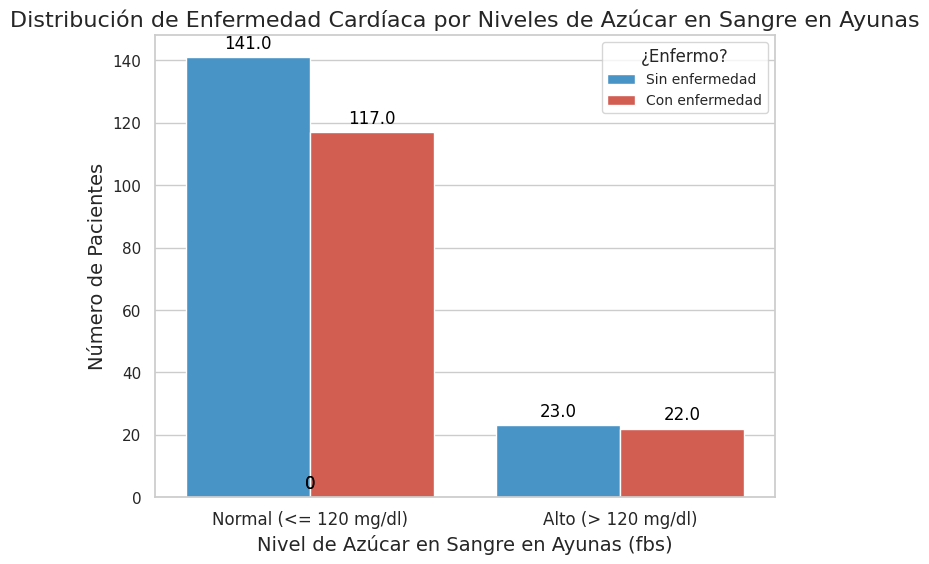

In [ ]:
custom_colors = ['#3498db', '#e74c3c']

# Configuración del estilo
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['fbs'], hue=df["target"], palette=custom_colors)
plt.title("Distribución de Enfermedad Cardíaca por Niveles de Azúcar en Sangre en Ayunas", fontsize=16)
plt.xlabel("Nivel de Azúcar en Sangre en Ayunas (fbs)", fontsize=14)
plt.ylabel("Número de Pacientes", fontsize=14)
plt.xticks([0, 1], ["Normal (<= 120 mg/dl)", "Alto (> 120 mg/dl)"], fontsize=12)
plt.legend(title='¿Enfermo?', labels=['Sin enfermedad', 'Con enfermedad'], title_fontsize='12', fontsize='10')

# Añadir texto en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black')

# Mostrar el gráfico
plt.show()

### Distribución de Enfermedad Cardíaca por Niveles de Azúcar en Sangre en Ayunas:

**Conclusión:** Se puede observar que la diferencia entre pacientes efermos y no enfermos con niveles de azucar normales y altos no es significativa, por lo tanto se purede concluir que el nivel de azucar no es un indicador contundente de presencia de enfermedad.

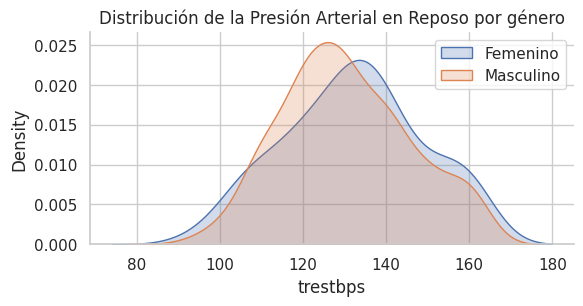

In [ ]:

# Crear una rejilla de gráficos de acuerdo a la columna 'sex', que indica el género de los pacientes
g = sns.FacetGrid(df, hue="sex", aspect=2)

# Mapear un gráfico de densidad a la rejilla para la presión arterial en reposo ('trestbps')
g.map(sns.kdeplot, 'trestbps', fill=True)

# Agregar un título al gráfico
plt.title('Distribución de la Presión Arterial en Reposo por género')

# Añadir leyenda al gráfico
plt.legend(labels=['Femenino', 'Masculino'])

### Conclusión de  la distribución de la Presión Arterial en Reposo por género:

**Conclusión:** No hay uma superposiciòn significativa enttre las dos curva, sin embargo sse podria concluir que hay uan leve mayor presiòn arterial en las mujeres que en los hombres.

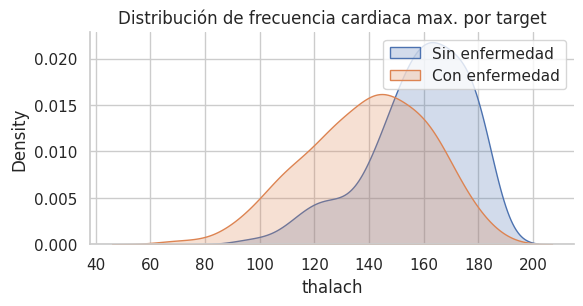

Ante mayor sea la frecuencia cardíaca alcanzada, menor es la posibilidad de tener un ataque al corazón


In [ ]:
# Crear una rejilla de gráficos de acuerdo a la columna 'target', que indica la presencia o ausencia de enfermedad cardíaca
g = sns.FacetGrid(df, hue="target", aspect=2)

# Mapear un gráfico de densidad a la rejilla para la frecuencia cardíaca máxima alcanzada ('thalach')
g.map(sns.kdeplot, 'thalach', fill=True)

# Agregar un título al gráfico
plt.title('Distribución de frecuencia cardiaca max. por target')

# Añadir leyenda al gráfico
plt.legend(labels=['Sin enfermedad', 'Con enfermedad'])

# Mostrar el gráfico
plt.show()

# Imprimir un mensaje explicativo sobre la interpretación del resultado
print("Ante mayor sea la frecuencia cardíaca alcanzada, menor es la posibilidad de tener un ataque al corazón")

###  Conclusión de la distribución de frecuencia cardiaca max. por target:

**Conclusión:** sse puede concluir que las personas enfermas tienen una menor frecuencia cardiaca.

**Analisis de variables cuantitativas- Test chi -square**:

Usando las tablas de contingencias mapear la relación entre variales cualitativas. el objetivo de este test es comparar la suma de diferencias al cuadrado (observado-esperado), entre lo que estamos observando. Esto permite cuantificar la magnitud de las distancias,comparar las con la distribución chi-square y decirdir si podemos afirmar que las variables estn relacionadas significativamente.

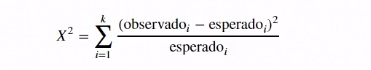


In [10]:
from scipy.stats import chi2_contingency

In [8]:
observados = pd.crosstab(index =df['target'], columns =
                                                        df['ca'],
                                                        margins =True
                                                        )
observados

ca,0.0,1.0,2.0,3.0,All
target,,,,,
0,130,21,7,3,161
1,46,44,31,17,138
All,176,65,38,20,299


In [11]:
test = chi2_contingency(observados)
test

Chi2ContingencyResult(statistic=71.84314194577351, pvalue=2.1092163554544226e-12, dof=8, expected_freq=array([[ 94.76923077,  35.        ,  20.46153846,  10.76923077,
        161.        ],
       [ 81.23076923,  30.        ,  17.53846154,   9.23076923,
        138.        ],
       [176.        ,  65.        ,  38.        ,  20.        ,
        299.        ]]))

In [12]:
esperados = pd.DataFrame(test[3])
esperados

,0,1,2,3,4
0,94.769231,35.0,20.461538,10.769231,161.0
1,81.230769,30.0,17.538462,9.230769,138.0
2,176.000000,65.0,38.000000,20.000000,299.0


In [13]:
#tabla von valores esperasoa relativos.

esperados_rel = round(esperados.apply(lambda r : r/len(df) *100, axis =1),2)
esperados_rel

,0,1,2,3,4
0,31.28,11.55,6.75,3.55,53.14
1,26.81,9.90,5.79,3.05,45.54
2,58.09,21.45,12.54,6.60,98.68


In [14]:
observados_rel = round(observados.apply(lambda r : r/len(df) *100, axis =1),2)
observados_rel

ca,0.0,1.0,2.0,3.0,All
target,,,,,
0,42.90,6.93,2.31,0.99,53.14
1,15.18,14.52,10.23,5.61,45.54
All,58.09,21.45,12.54,6.60,98.68


In [15]:
test[1]

2.1092163554544226e-12


### Conclusión  test chi squere:

**Conclusión:** P<0.05,Hay relaciòn entre variables.P> 0.05, No hay relaciòn entre variables.


**Tests cp VS fbs = 0.5909926846413971 Se puede afirmar que no  hay relación fuerte entre las variables**

**Tests cp VS sex = 8.013108659474269e-06 Se puede afirmar que hay fuerte relación entre las variables**

**Tests cp VS restecg = 0.06691116900018962 Se puede afirmar que  no hay relación entre las variables**

**Tests cp VS exang = 1.4239073261163362e-33 Se puede afirmar que hay relación fuerte  entre las variables**

**Tests cp VS slope = 3.63333289111837e-06 Se puede afirmar que hay relación fuerte  entre las variables**

**Tests fbs VS restecg = 0.0003128297439229264 Se puede afirmar que hay relación entre las variables**

**Tests slope VS fbs = 0.3617181258305092 Se puede afirmar que no hay relación entre las variables**

**Tests Ca VS fbs = 1.1300878625809743e-12 Se puede afirmar que hay relación entre las variables**

**Tests slope VS ca = 0.6426140997344252 Se puede afirmar que  no hay relación entre las variables**

###**12. Ejercicio de regresion logistica:**

 Con el objetivo de buscar un modelo que explique las enfermedades, usamos la regresiòn logisticca que es un método estadistico utilizado para predecir la probabilidad de una variable categorica, que susalmente representa dos categorias o estados por ejemplo exito o fracaso, entra o no en incumplimiento, a diferencia de la regresión lineal que predice un valor continuo la regresión logistica estima la probabilidaa de que una observación pertenezca a una categoria.


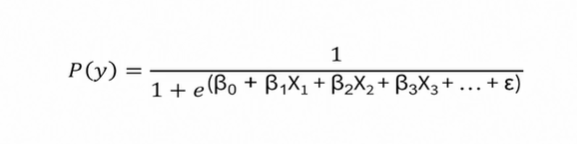

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
numericas

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
df['ca'].unique()

array([0., 3., 2., 1.])

In [ ]:
df[categoricas].head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,1,1,2,0,3,0.0,6.0,0
1,1,4,0,2,1,2,3.0,3.0,1
2,1,4,0,2,1,2,2.0,7.0,1
3,1,3,0,0,0,3,0.0,3.0,0
4,0,2,0,2,0,1,0.0,3.0,0


In [ ]:
df[['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach',
       'exang', 'oldpeak', 'slope', 'thal']].nunique()

age          35
sex           2
cp            4
trestbps     41
chol        139
thalach      81
exang         2
oldpeak      32
slope         3
thal          3
dtype: int64

In [ ]:
model=sm.Logit(df.loc[:,'target'], df[numericas+['sex','ca']])

In [ ]:
model.fit()

Optimization terminated successfully.
         Current function value: 0.430593
         Iterations 7


In [ ]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.430593
         Iterations 7


In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                  0.3757
Time:                        13:19:43   Log-Likelihood:                -130.47
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 2.504e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0202      0.018     -1.099      0.272      -0.056       0.016
trestbps       0.0172      0.010      1.745      0.081      -0.002       0.037
chol           0.0089      0.004      2.404      0.0

En resumen, estos coeficientes indican las direcciones y magnitudes de las asociaciones entre las variables independientes y la probabilidad logarítmica de tener enfermedad cardíaca. La significancia estadística se evalúa por los p-valores asociados.



* Edad (age): Un decremento en la edad está asociado con una disminución del logaritmo de la probabilidad de tener enfermedad cardíaca. Sin embargo, el coeficiente no es significativo (p > 0.05).

* Presión arterial en reposo (trestbps): Un incremento está asociado con un aumento del logaritmo de la probabilidad de enfermedad cardíaca. Aunque el coeficiente es positivo, no es significativo (p > 0.05).

* Colesterol sérico (chol): Un incremento en el colesterol sérico está asociado con un aumento del logaritmo de la probabilidad de enfermedad cardíaca. Este coeficiente es significativo (p < 0.05).

* Frecuencia cardíaca máxima alcanzada (thalach): Un decremento en la frecuencia cardíaca máxima está asociado con una disminución del logaritmo de la probabilidad de enfermedad cardíaca. Este coeficiente es significativo (p < 0.05).

* Depresión del segmento ST inducida por el ejercicio en relación con el reposo (oldpeak): Un incremento en este índice está asociado con un aumento del logaritmo de la probabilidad de enfermedad cardíaca. Este coeficiente es significativo (p < 0.05).

* Sexo (sex): Ser hombre (1) está asociado con un aumento significativo del logaritmo de la probabilidad de enfermedad cardíaca.

* Número de vasos principales coloreados por fluoroscopía (ca): Un incremento está asociado con un aumento significativo del logaritmo de la probabilidad de enfermedad cardíaca.